# Credit Card Fraud Detection.
Banks, merchants and credit card processors companies lose billions of dollars every year to credit card fraud. Credit card data can be stolen by criminals but sometimes the criminal is simply the clerk that processes your card when you buy things.

## Logistic Regression Versus Anomaly Detection
This is a classical example of unbalanced dataset, where there are less than 0.2% of cases that are of interest. General classification Algorithms fail miserably here because of unbalanced nature of dataset and Anomaly Detection algorithm starts to shine.

## What is Logistic Regression
Logistic regression is a class of supervised algorithms, which attempts to establish a discrete relationship between dependent variable and set of independent variables. It predicts one class for all samples in the dataset.

### What is Anomaly Detection
Anomaly is defined as something that deviates from the normal behaviour or what is expected. For more clarity let’s take an example of credit caard transactions. Suppose you typically spend between $10-$200. One day $4,000 amount is transacted using credit card as a downpayment for the car. This is unusual credit card activity. This transaction is flaged as an anomaly for credit card companies.


In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Hyper parameters
learning_rate = 1
training_epochs = 100
display_step = 50

# Dataset

Dataset can be downnloaded from https://people.rit.edu/~hvp4259/project/data/creditcard.csv

Our dataset has 285k samples with 31 features. 
This datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Below is a sample of the dataset

-----------------------------------

|"Time"|"V1"|"V2"|"V3"|"V4"|"V5"|"V6"|"V7"|"V8"|"V9"|"V10"|"V11"|"V12"|"V13"|"V14"|"V15"|"V16"|"V17"|"V18"|"V19"|"V20"|"V21"|"V22"|"V23"|"V24"|"V25"|"V26"|"V27"|"V28"|"Amount"|"Class"|
|------|----|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|--------|-------|
|0|-1.3598071336738|-0.0727811733098497|2.53634673796914|1.37815522427443|-0.338320769942518|0.462387777762292|0.239598554061257|0.0986979012610507|0.363786969611213|0.0907941719789316|-0.551599533260813|-0.617800855762348|-0.991389847235408|-0.311169353699879|1.46817697209427|-0.470400525259478|0.207971241929242|0.0257905801985591|0.403992960255733|0.251412098239705|-0.018306777944153|0.277837575558899|-0.110473910188767|0.0669280749146731|0.128539358273528|-0.189114843888824|0.133558376740387|-0.0210530534538215|149.62|"0"|
|0|1.19185711131486|0.26615071205963|0.16648011335321|0.448154078460911|0.0600176492822243|-0.0823608088155687|-0.0788029833323113|0.0851016549148104|-0.255425128109186|-0.166974414004614|1.61272666105479|1.06523531137287|0.48909501589608|-0.143772296441519|0.635558093258208|0.463917041022171|-0.114804663102346|-0.183361270123994|-0.145783041325259|-0.0690831352230203|-0.225775248033138|-0.638671952771851|0.101288021253234|-0.339846475529127|0.167170404418143|0.125894532368176|-0.00898309914322813|0.0147241691924927|2.69|"0"|
|1|-1.35835406159823|-1.34016307473609|1.77320934263119|0.379779593034328|-0.503198133318193|1.80049938079263|0.791460956450422|0.247675786588991|-1.51465432260583|0.207642865216696|0.624501459424895|0.066083685268831|0.717292731410831|-0.165945922763554|2.34586494901581|-2.89008319444231|1.10996937869599|-0.121359313195888|-2.26185709530414|0.524979725224404|0.247998153469754|0.771679401917229|0.909412262347719|-0.689280956490685|-0.327641833735251|-0.139096571514147|-0.0553527940384261|-0.0597518405929204|378.66|"0"|
|1|-0.966271711572087|-0.185226008082898|1.79299333957872|-0.863291275036453|-0.0103088796030823|1.24720316752486|0.23760893977178|0.377435874652262|-1.38702406270197|-0.0549519224713749|-0.226487263835401|0.178228225877303|0.507756869957169|-0.28792374549456|-0.631418117709045|-1.0596472454325|-0.684092786345479|1.96577500349538|-1.2326219700892|-0.208037781160366|-0.108300452035545|0.00527359678253453|-0.190320518742841|-1.17557533186321|0.647376034602038|-0.221928844458407|0.0627228487293033|0.0614576285006353|123.5|"0"|

In [3]:
#Load dataset
datafile = os.path.join('creditcard.csv')
df = pd.read_csv(datafile,header = 0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Generates descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualize

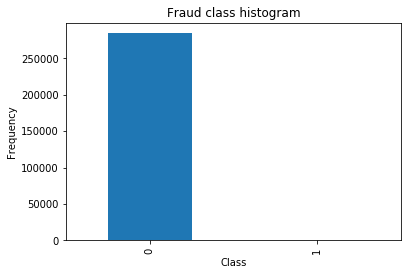

In [5]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## Divide and randomize the dataset
into training dataset and validation dataset

In [23]:
dataset = tf.contrib.learn.extract_pandas_data(df)
np.random.shuffle(dataset)

# Count fraud class members.
fraud_indices = [i for i in range(dataset.shape[0]) if ( dataset[i][30] > 1e-9 )]
print('There are a total of ', len(fraud_indices), 'fraud cases')

# Divide the dataset
split_index = int(dataset.shape[0]*0.8)
train_dataset = dataset[:split_index, :]
test_dataset  = dataset[split_index:, :]

# Verify sizes
print('Train dataset :',  train_dataset.shape)
print('Test  dataset : ', test_dataset.shape)
print('Total dataset :',  dataset.shape)

There are a total of  492 fraud cases
Train dataset : (227845, 31)
Test  dataset :  (56962, 31)
Total dataset : (284807, 31)


# Features and Labels

Create one-hot labels suitable for classification (logistic regression)

In [7]:
train_X = train_dataset[:,:30]
test_X  = test_dataset[:,:30]

# create one-hot labels with 0 as genuine class and 1 as fraud class.
train_Y = np.eye(2)[train_dataset[:,30].astype(np.int32).tolist()]
test_Y  = np.eye(2)[test_dataset[:,30].astype(np.int32).tolist()]

print('sample fraud one hot class', train_Y[541])

sample fraud one hot class [ 1.  0.]


# Logistic Regression

## LR Declare Graph Variables

Place to declare plave holders and variables for compute graph

In [8]:
SIGMA      = np.sqrt(2.0/train_X.shape[0])
n_features = train_X.shape[1]
n_labels   = 2

# tf Graph Input
X = tf.placeholder(tf.float32, shape=(None, n_features), name='X');
Y = tf.placeholder(tf.float32, shape=(None, n_labels), name='Y');

# Set model weights
Weights = tf.Variable(tf.truncated_normal(shape=[n_features, n_labels], mean=3.0*SIGMA, stddev=SIGMA, dtype=tf.float32), trainable=True)
Biases  = tf.Variable(tf.constant(value=SIGMA, dtype=tf.float32, shape=[n_labels]), trainable=True)

##  LR  Compute Graph
Construct a multivariate polynomial model

In [9]:
Y_                 = tf.matmul(X, Weights) + Biases

Y_cls              = tf.argmax(Y,  axis=1)
predictions_cls    = tf.argmax(Y_, axis=1)
correct_prediction = tf.equal(predictions_cls, Y_cls)
accuracy           = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# change it to sigmoid_cross_entropy_with_logits
cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=Y_,
                                                        labels=Y)


##  LR Cost function and Optimizer

In [10]:
# Mean  error
cost = tf.reduce_mean(cross_entropy)

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

##  Train the  LR  Model

In [11]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
sess = tf.Session()
sess.run(init)

for epoch in range(training_epochs):
    sess.run(optimizer, feed_dict={X:train_X, Y:train_Y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c, a = sess.run([cost, accuracy], feed_dict={X:train_X, Y:train_Y})
        print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.1f}".format(c), ", % accuracy=", "{:.3f}".format(100.0*a))

print( "\nOptimization Finished!" )

Epoch: 0050 cost= 6260304.5 , % accuracy= 99.823
Epoch: 0100 cost= 5750463.0 , % accuracy= 99.823

Optimization Finished!


# Validate  LR Model

In [12]:
preds, t_acc = sess.run([Y_, accuracy], feed_dict={X:train_X, Y:train_Y})
print ("% Training accuracy=", "{:.3f}".format(100*t_acc))

v_acc = sess.run(accuracy, feed_dict={X:test_X, Y:test_Y})
print ("% Test     accuracy=", "{:.3f}".format(100*v_acc))

% Training accuracy= 99.823
% Test     accuracy= 99.846


# LR Confusion Matrix

[[227441      0]
 [   404      0]]


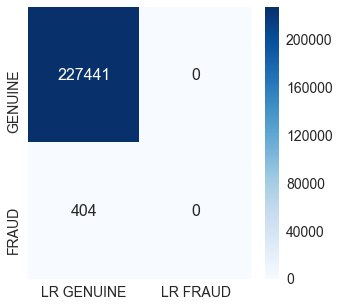

In [22]:
lrcm = tf.confusion_matrix(labels=np.argmax(train_Y, axis=1), predictions=np.argmax(preds, axis=1), num_classes=2)
lrcm_ary = lrcm.eval(session=sess)
print(lrcm_ary)

# Plot confusion matrix
import seaborn as sn

df_lrcm = pd.DataFrame(lrcm_ary, index = [i for i in ['GENUINE', 'FRAUD']], 
                       columns = [i for i in ['LR GENUINE', 'LR FRAUD']])
plt.figure(figsize = (5,5))
sn.heatmap(df_lrcm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 16})# font size
sn.set(font_scale=1.4)#for label size
plt.show()

## Logistic Regression Failed !
Confusion matrix shows that it failed to detct fraud cases, even though accruacy is over 99.82%.

# Anomaly Detection (AD)
Now we'll use anomaly detection to see, if it can help us catch fraud cases.

We use a Density-Based Anomaly Detection algorithm. This algorithm assumes that normal data points occur around a dense neighborhood and abnormalities are far away. It finds μ (mean) and σ (standard deviation) of each feature in the set. These μ (mean) and σ (standard deviation) is used to compute probability for each sample. These probabilities are collected for every sample in the dataset to find local outlier factor (LOF).

Samples with probabilities lower than LOF are marked with fraud class.

In [24]:
def gauss_prob(x, mu, sigma):
    root_2pi = np.sqrt(2*np.pi)
    sz = len(x)
    pf = [None]*sz
    for i in range(sz):
        pf[i] = np.exp(- (x[i]-mu[i])**2 / (2*sigma[i]**2) ) / (root_2pi*sigma[i])
    return pf

feature_sz    = dataset.shape[1]-1;
feature_mu    = [None]*feature_sz;
feature_sigma = [None]*feature_sz;
for fi in range(feature_sz):
    feature_mu[fi]    = np.mean(dataset[:,fi])
    feature_sigma[fi] = np.std(dataset[:,fi])

dataset_sz   = dataset.shape[0]
dataset_prob = [None]*dataset_sz
fraud_prob   = []
for i in range(dataset_sz):
    dataset_prob[i] = np.prod(gauss_prob(dataset[i][:feature_sz], feature_mu, feature_sigma))
    if ( dataset[i,feature_sz] > 0.1 ):
        fraud_prob.append(dataset_prob[i])

lof_epsilon = np.std(fraud_prob)**2

Dataset:  4.47425659645e-21 1.08384324306e-20
Fraud  :  7.96331127697e-23 6.48442717393e-22


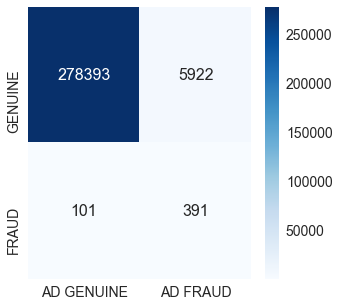

In [25]:
print('Dataset: ', np.mean(dataset_prob), np.std(dataset_prob))
print('Fraud  : ', np.mean(fraud_prob), np.std(fraud_prob))

adcm = tf.confusion_matrix(dataset[:,feature_sz], dataset_prob<lof_epsilon, num_classes=2)

adcm_ary = adcm.eval(session=sess)

# Compare Confusion Matrices by Logistic Regression and Anomaly Detection

# Plot confusion matrix
df_adcm = pd.DataFrame(adcm_ary, index = [i for i in ['GENUINE', 'FRAUD']], columns = [i for i in ['AD GENUINE', 'AD FRAUD']])
plt.figure(figsize = (5,5))
sn.heatmap(df_adcm, cmap="Blues", annot=True, fmt='d', annot_kws={"size": 16})# font size
sn.set(font_scale=1.4)#for label size
plt.show()

# Conclusion

1. Logistic Regression and neural network based classifiers fail on unbalanced dataset like credit card fraud dataset.
2. Simple Anomaly Detection outshines these classifiers.

### Visualize and znalyze your dataset before you decide on the model
